In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!pip install kaggle


In [3]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets list | head


ref                                                             title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                             Chocolate Sales                                       468320  2026-01-04 14:23:35.490000          18873        335  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                 1297759  2026-02-01 11:37:12.353000           4387         79  1.0              
ashrafkhetran/the-movies-database-tmdb-1950-2025                The Movies database (TMDB) 1950-2025                    4897  2026-02-09 05:35:40.533000           1104         26  1.0              
ayeshasidd

In [5]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
 99% 3.06G/3.10G [00:37<00:00, 199MB/s]
100% 3.10G/3.10G [00:37<00:00, 88.8MB/s]


In [7]:
!unzip breast-histopathology-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [10]:
!ls /content


10253  12242  12895  13459  15472  8916  9225
10254  12626  12896  13460  15473  8917  9226
10255  12748  12897  13461  15510  8918  9227
10256  12749  12898  13462  15512  8950  9228
10257  12750  12900  13591  15513  8951  9250
10258  12751  12901  13613  15514  8955  9254
10259  12752  12905  13616  15515  8956  9255
10260  12810  12906  13617  15516  8957  9256
10261  12811  12907  13666  15632  8959  9257
10262  12817  12908  13687  15633  8974  9258
10264  12818  12909  13688  15634  8975  9259
10268  12819  12910  13689  15839  8980  9260
10269  12820  12911  13691  15840  8984  9261
10272  12821  12929  13692  15902  9022  9262
10273  12822  12930  13693  15903  9023  9265
10274  12823  12931  13694  16014  9029  9266
10275  12824  12932  13916  16085  9035  9267
10276  12826  12933  14078  16165  9036  9290
10277  12867  12934  14079  16166  9037  9291
10278  12868  12935  14081  16167  9041  9319
10279  12869  12947  14082  16531  9043  9320
10282  12870  12948  14153  16532 

In [11]:
!ls /content/IDC_regular_ps50_idx5


10253  10288  12810  12881  12930  13403  14153  15513	16554  8980  9174  9291
10254  10290  12811  12882  12931  13404  14154  15514	16555  8984  9175  9319
10255  10291  12817  12883  12932  13458  14155  15515	16568  9022  9176  9320
10256  10292  12818  12884  12933  13459  14156  15516	16569  9023  9177  9321
10257  10293  12819  12886  12934  13460  14157  15632	16570  9029  9178  9322
10258  10295  12820  12890  12935  13461  14188  15633	16895  9035  9181  9323
10259  10299  12821  12891  12947  13462  14189  15634	16896  9036  9225  9324
10260  10300  12822  12892  12948  13591  14190  15839	8863   9037  9226  9325
10261  10301  12823  12893  12949  13613  14191  15840	8864   9041  9227  9344
10262  10302  12824  12894  12951  13616  14192  15902	8865   9043  9228  9345
10264  10303  12826  12895  12954  13617  14209  15903	8867   9044  9250  9346
10268  10304  12867  12896  12955  13666  14210  16014	8913   9073  9254  9347
10269  10305  12868  12897  13018  13687  14211  160

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [14]:
import os
import shutil

BASE_DIR = "/content/IDC_regular_ps50_idx5"
TARGET_DIR = "/content/IDC_BINARY"

benign_dir = os.path.join(TARGET_DIR, "benign")
malignant_dir = os.path.join(TARGET_DIR, "malignant")

os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)


In [15]:
import random

MAX_IMAGES_PER_CLASS = 3000  # safe for Colab GPU

benign_count = 0
malignant_count = 0

for patient in os.listdir(BASE_DIR):
    patient_path = os.path.join(BASE_DIR, patient)
    if not os.path.isdir(patient_path):
        continue

    for label in ["0", "1"]:
        label_path = os.path.join(patient_path, label)
        if not os.path.exists(label_path):
            continue

        images = os.listdir(label_path)
        random.shuffle(images)

        for img in images:
            src = os.path.join(label_path, img)

            if label == "0" and benign_count < MAX_IMAGES_PER_CLASS:
                shutil.copy(src, benign_dir)
                benign_count += 1

            elif label == "1" and malignant_count < MAX_IMAGES_PER_CLASS:
                shutil.copy(src, malignant_dir)
                malignant_count += 1

            if benign_count >= MAX_IMAGES_PER_CLASS and malignant_count >= MAX_IMAGES_PER_CLASS:
                break

    if benign_count >= MAX_IMAGES_PER_CLASS and malignant_count >= MAX_IMAGES_PER_CLASS:
        break

print("Benign images:", benign_count)
print("Malignant images:", malignant_count)


Benign images: 3000
Malignant images: 3000


In [16]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (128,128)
BATCH_SIZE = 8

train_ds = image_dataset_from_directory(
    "/content/IDC_BINARY",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = image_dataset_from_directory(
    "/content/IDC_BINARY",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)


Found 6000 files belonging to 2 classes.
Using 4800 files for training.
Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


In [18]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(
    lambda x, y: (x / 255.0, y)
).prefetch(AUTOTUNE)

val_ds = val_ds.map(
    lambda x, y: (x / 255.0, y)
).prefetch(AUTOTUNE)


In [19]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision')
    ]
)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5466 - loss: 0.6910 - precision: 0.5201 - recall: 0.3652 - val_accuracy: 0.7725 - val_loss: 0.4974 - val_precision: 0.8645 - val_recall: 0.6569
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7219 - loss: 0.5325 - precision: 0.7335 - recall: 0.6685 - val_accuracy: 0.7850 - val_loss: 0.4453 - val_precision: 0.7194 - val_recall: 0.9615
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8011 - loss: 0.4674 - precision: 0.8208 - recall: 0.7381 - val_accuracy: 0.7225 - val_loss: 0.6742 - val_precision: 0.9694 - val_recall: 0.4680
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8287 - loss: 0.4045 - precision: 0.8671 - recall: 0.7540 - val_accuracy: 0.8225 - val_loss: 0.3773 - val_precision: 0.8269 - val_recall: 0.8309
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8152 - loss: 0.4283 - precision: 0.8328 - recall: 0.7718 - val_accuracy: 0.8150 - val_loss: 0.38

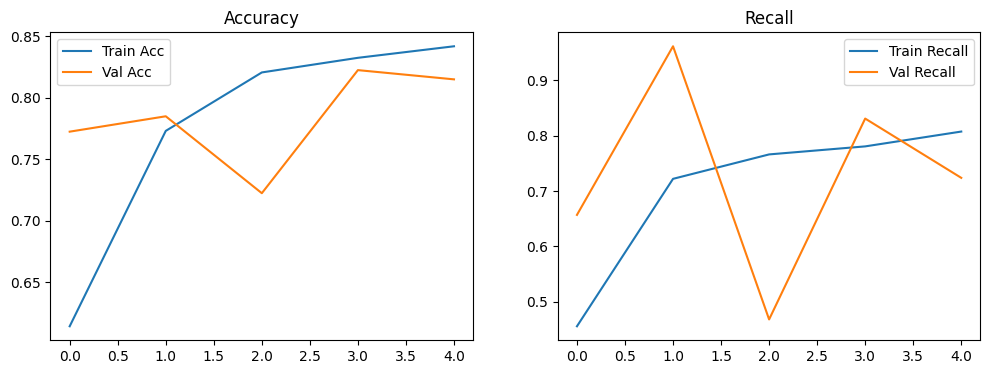

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.legend()
plt.title("Recall")

plt.show()


In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Benign","Malignant"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/ste

In [27]:
model.save("/content/baseline_cnn_idc.keras")


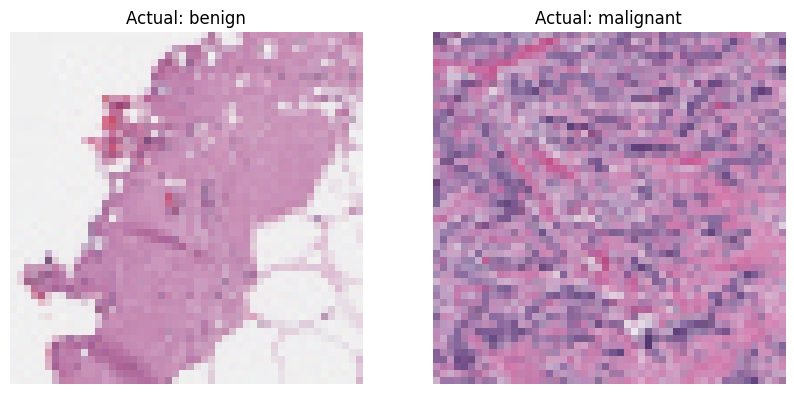

In [28]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

base_dir = "/content/IDC_BINARY"

plt.figure(figsize=(10,5))

for i, cls in enumerate(["benign", "malignant"]):
    cls_dir = os.path.join(base_dir, cls)
    img_name = random.choice(os.listdir(cls_dir))
    img_path = os.path.join(cls_dir, img_name)

    img = Image.open(img_path)

    plt.subplot(1,2,i+1)
    plt.imshow(img)
    plt.title(f"Actual: {cls}")
    plt.axis("off")

plt.show()


In [29]:
import numpy as np
import tensorflow as tf

def predict_single_image(img_path, model):
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(128,128)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prob = model.predict(img_array)[0][0]

    if prob > 0.5:
        return "Malignant", prob
    else:
        return "Benign", prob


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step


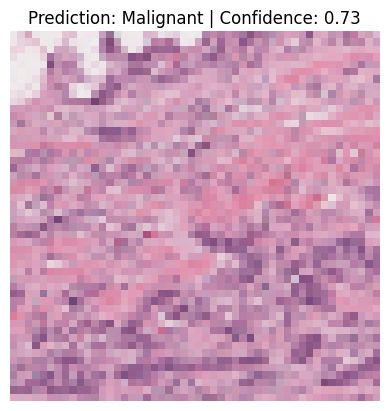

In [30]:
test_img = random.choice(os.listdir(os.path.join(base_dir, "malignant")))
test_path = os.path.join(base_dir, "malignant", test_img)

label, confidence = predict_single_image(test_path, model)

img = Image.open(test_path)
plt.imshow(img)
plt.title(f"Prediction: {label} | Confidence: {confidence:.2f}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


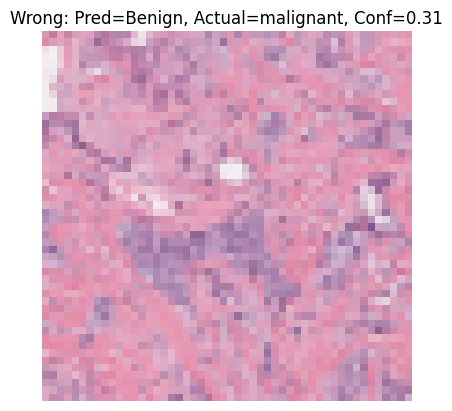

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


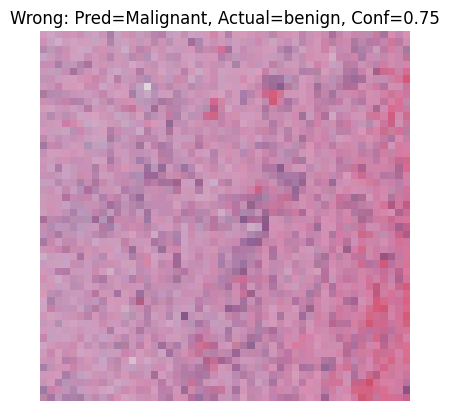

In [31]:
for cls in ["malignant", "benign"]:
    cls_dir = os.path.join(base_dir, cls)
    for img_name in os.listdir(cls_dir)[:10]:
        img_path = os.path.join(cls_dir, img_name)
        pred, prob = predict_single_image(img_path, model)

        if pred != cls.capitalize():
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"Wrong: Pred={pred}, Actual={cls}, Conf={prob:.2f}")
            plt.axis("off")
            plt.show()
            break


In [32]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0


In [34]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [35]:
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
)

base_model.trainable = False  # FREEZE pretrained layers


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [36]:
model_tl = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation="sigmoid")
])


In [37]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.Precision(name="precision")
    ]
)


In [38]:
model_tl.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [42]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = []

for _, y in train_ds:
    labels.extend(y.numpy().flatten())  # ✅ flatten to get ints

labels = np.array(labels).astype(int)

print("Unique labels:", np.unique(labels, return_counts=True))


Unique labels: (array([0, 1]), array([821, 779]))


In [43]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=labels
)

class_weights = {
    0: class_weights[0],
    1: class_weights[1]
}

print("Class weights:", class_weights)


Class weights: {0: np.float64(0.97442143727162), 1: np.float64(1.0269576379974326)}


In [44]:
history_tl = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    class_weight=class_weights
)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5174 - loss: 0.7009 - precision: 0.4281 - recall: 0.3705 - val_accuracy: 0.5150 - val_loss: 0.6933 - val_precision: 0.5150 - val_recall: 1.0000
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5070 - loss: 0.6981 - precision: 0.4799 - recall: 0.4839 - val_accuracy: 0.5100 - val_loss: 0.6941 - val_precision: 0.5100 - val_recall: 1.0000
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4893 - loss: 0.7023 - precision: 0.4552 - recall: 0.4308 - val_accuracy: 0.4950 - val_loss: 0.6973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5007 - loss: 0.6985 - precision: 0.4025 - recall: 0.2494 - val_accuracy: 0.4875 - val_loss: 0.7018 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5026 - loss: 0.7049 - precision: 0.4625 - recall: 0.4450 - val_accuracy: 0.51

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model_tl.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Benign","Malignant"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report


In [57]:
IMG_SIZE = (224, 224)   # REQUIRED for pretrained models
BATCH_SIZE = 8

train_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/IDC_BINARY",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/IDC_BINARY",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds_tl = train_ds_tl.prefetch(AUTOTUNE)
val_ds_tl = val_ds_tl.prefetch(AUTOTUNE)


Found 6000 files belonging to 2 classes.
Using 4800 files for training.
Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


In [58]:
labels = []
for _, y in train_ds_tl:
    labels.extend(y.numpy().flatten())

labels = np.array(labels).astype(int)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0,1]),
    y=labels
)

class_weights = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weights)


Class weights: {0: np.float64(0.990916597853014), 1: np.float64(1.0092514718250631)}


In [59]:
base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # freeze first

model_tl = models.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [60]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.Precision(name="precision")
    ]
)


In [61]:
history_tl = model_tl.fit(
    train_ds_tl,
    validation_data=val_ds_tl,
    epochs=10,
    class_weight=class_weights
)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.7427 - loss: 0.5354 - precision: 0.7083 - recall: 0.8247 - val_accuracy: 0.9050 - val_loss: 0.2485 - val_precision: 0.9032 - val_recall: 0.9148
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8761 - loss: 0.3199 - precision: 0.8702 - recall: 0.8758 - val_accuracy: 0.9150 - val_loss: 0.2242 - val_precision: 0.9140 - val_recall: 0.9228
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8776 - loss: 0.2992 - precision: 0.8796 - recall: 0.8674 - val_accuracy: 0.9117 - val_loss: 0.2188 - val_precision: 0.9135 - val_recall: 0.9164
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8923 - loss: 0.2777 - precision: 0.8904 - recall: 0.8877 - val_accuracy: 0.9192 - val_loss: 0.2080 - val_precision: 0.9200 - val_recall: 0.9244
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9017 - loss: 0.2535 - precision: 0.8953 - recall: 0.9028 - val_accuracy: 0.9183 - va

In [62]:
y_true = []
y_pred = []

for images, labels in val_ds_tl:
    preds = model_tl.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign","Malignant"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━

In [63]:
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False


In [64]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.Precision(name="precision")
    ]
)


In [65]:
history_ft = model_tl.fit(
    train_ds_tl,
    validation_data=val_ds_tl,
    epochs=5,
    class_weight=class_weights
)


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 76s 57ms/step - accuracy: 0.8995 - loss: 0.2411 - precision: 0.8971 - recall: 0.8965 - val_accuracy: 0.9242 - val_loss: 0.1969 - val_precision: 0.9275 - val_recall: 0.9260
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9165 - loss: 0.2166 - precision: 0.9100 - recall: 0.9193 - val_accuracy: 0.9250 - val_loss: 0.1979 - val_precision: 0.9263 - val_recall: 0.9293
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9160 - loss: 0.2128 - precision: 0.9066 - recall: 0.9227 - val_accuracy: 0.9258 - val_loss: 0.1970 - val_precision: 0.9278 - val_recall: 0.9293
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9257 - loss: 0.2096 - precision: 0.9190 - recall: 0.9286 - val_accuracy: 0.9267 - val_loss: 0.1959 - val_precision: 0.9306 - val_recall: 0.9277
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9196 - loss: 0.2065 - precision: 0.9203 - recall: 0.9140 - val_accuracy: 0.9267 - val_los

In [66]:
y_true = []
y_pred = []

for images, labels in val_ds_tl:
    preds = model_tl.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign","Malignant"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

In [67]:
model.save("/content/densenet_tl_baseline.keras")


In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_prob = []

for images, labels in val_ds_tl:   # use TRANSFER LEARNING val set
    probs = model.predict(images)
    y_prob.extend(probs.flatten())
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_prob = np.array(y_prob)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━

In [69]:
# thresholds = [0.5, 0.45, 0.4, 0.35, 0.3]

# for t in thresholds:
#     y_pred = (y_prob >= t).astype(int)

#     print(f"\n===== Threshold = {t} =====")
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_true, y_pred))

#     print("Classification Report:")
#     print(classification_report(
#         y_true, y_pred,
#         target_names=["Benign", "Malignant"]
#     ))



===== Threshold = 0.5 =====
Confusion Matrix:
[[185 393]
 [256 366]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.42      0.32      0.36       578
   Malignant       0.48      0.59      0.53       622

    accuracy                           0.46      1200
   macro avg       0.45      0.45      0.45      1200
weighted avg       0.45      0.46      0.45      1200


===== Threshold = 0.45 =====
Confusion Matrix:
[[111 467]
 [141 481]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.44      0.19      0.27       578
   Malignant       0.51      0.77      0.61       622

    accuracy                           0.49      1200
   macro avg       0.47      0.48      0.44      1200
weighted avg       0.48      0.49      0.45      1200


===== Threshold = 0.4 =====
Confusion Matrix:
[[ 62 516]
 [ 70 552]]
Classification Report:
              precision    recall  f1-score   support

      Benig

In [70]:
# for t in [0.45, 0.4]:
#     y_pred = (y_prob >= t).astype(int)

#     print(f"\n===== Threshold = {t} =====")
#     print(confusion_matrix(y_true, y_pred))
#     print(classification_report(
#         y_true, y_pred,
#         target_names=["Benign", "Malignant"]
#     ))



===== Threshold = 0.45 =====
[[111 467]
 [141 481]]
              precision    recall  f1-score   support

      Benign       0.44      0.19      0.27       578
   Malignant       0.51      0.77      0.61       622

    accuracy                           0.49      1200
   macro avg       0.47      0.48      0.44      1200
weighted avg       0.48      0.49      0.45      1200


===== Threshold = 0.4 =====
[[ 62 516]
 [ 70 552]]
              precision    recall  f1-score   support

      Benign       0.47      0.11      0.17       578
   Malignant       0.52      0.89      0.65       622

    accuracy                           0.51      1200
   macro avg       0.49      0.50      0.41      1200
weighted avg       0.49      0.51      0.42      1200



In [78]:
y_true = []
y_pred = []

for images, labels in val_ds_tl:
    preds = model_tl.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign","Malignant"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [90]:
#baseline cnn
import tensorflow as tf

IMG_SIZE = (128, 128)   # CNN can use smaller size
BATCH_SIZE = 16

train_ds_cnn = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/IDC_BINARY",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds_cnn = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/IDC_BINARY",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds_cnn = train_ds_cnn.prefetch(AUTOTUNE)
val_ds_cnn = val_ds_cnn.prefetch(AUTOTUNE)


Found 6000 files belonging to 2 classes.
Using 4800 files for training.
Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


In [91]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128,128,3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision')
    ]
)


In [93]:
history_cnn = cnn_model.fit(
    train_ds_cnn,
    validation_data=val_ds_cnn,
    epochs=10
)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6325 - loss: 0.6217 - precision: 0.6521 - recall: 0.5089 - val_accuracy: 0.7700 - val_loss: 0.4651 - val_precision: 0.9347 - val_recall: 0.5981
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8212 - loss: 0.4135 - precision: 0.8513 - recall: 0.7665 - val_accuracy: 0.8608 - val_loss: 0.3444 - val_precision: 0.8628 - val_recall: 0.8698
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8425 - loss: 0.3764 - precision: 0.8625 - recall: 0.8043 - val_accuracy: 0.8142 - val_loss: 0.3929 - val_precision: 0.9503 - val_recall: 0.6768
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8612 - loss: 0.3360 - precision: 0.8801 - recall: 0.8278 - val_accuracy: 0.8708 - val_loss: 0.2988 - val_precision: 0.8736 - val_recall: 0.8778
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8598 - loss: 0.3388 - precision: 0.8678 - recall: 0.8414 - val_accuracy: 0.8758 - val_lo

In [94]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for images, labels in val_ds_cnn:
    probs = cnn_model.predict(images)
    preds = (probs > 0.5).astype(int)

    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

print("Confusion Matrix (Baseline CNN – Full Data):")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true, y_pred,
    target_names=["Benign","Malignant"]
))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━

In [96]:
cnn_model.save("/content/baseline_cnn_full_data.keras")
